<a href="https://colab.research.google.com/github/GabriellCarvalho/Telco-Customer-Churn/blob/master/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

path = kagglehub.dataset_download('blastchar/telco-customer-churn')

print('Path to dataset files: ', path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files:  /kaggle/input/telco-customer-churn


In [ ]:
import pandas as pd
customer_churn = pd.read_csv(path + '/WA_Fn-UseC_-Telco-Customer-Churn.csv')
customer_churn.shape

(7043, 21)

In [ ]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
customer_churn.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
def tabela_metadados(df):

  tabela = pd.DataFrame({
      'variavel': df.columns,
      'tipo': df.dtypes.astype(str),
      'n_nulos': df.isna().sum().values,
      'pct_nulos': (df.isna().sum().values / df.shape[0] * 100).round(2)
  })

  tabela['tipo'] = tabela['tipo'].replace({
      'object': 'categorica',
      'category': 'categorica',
      'int64' : 'numerica',
      'float64': 'numerica',
      'datetime64[ns]': 'data'
  })

  tabela['cardinalidade'] = [
      df[col].nunique() if tipo == 'categorica' else None
      for col, tipo in zip(tabela['variavel'], tabela['tipo'])
  ]

  return tabela

metadados = tabela_metadados(customer_churn)
metadados


,variavel,tipo,n_nulos,pct_nulos,cardinalidade
customerID,customerID,categorica,0,0.0,7043.0
gender,gender,categorica,0,0.0,2.0
SeniorCitizen,SeniorCitizen,numerica,0,0.0,NaN
Partner,Partner,categorica,0,0.0,2.0
Dependents,Dependents,categorica,0,0.0,2.0
tenure,tenure,numerica,0,0.0,NaN
PhoneService,PhoneService,categorica,0,0.0,2.0
MultipleLines,MultipleLines,categorica,0,0.0,3.0
InternetService,InternetService,categorica,0,0.0,3.0
OnlineSecurity,OnlineSecurity,categorica,0,0.0,3.0


In [ ]:
import numpy as np
customer_churn['Churn'] = customer_churn['Churn'].map({'Yes' : 1, 'No' : 0}).astype(int)

customer_churn['TotalCharges'] = customer_churn['TotalCharges'].replace(' ', np.nan).astype(float)
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
metadados = tabela_metadados(customer_churn)
metadados

,variavel,tipo,n_nulos,pct_nulos,cardinalidade
customerID,customerID,categorica,0,0.00,7043.0
gender,gender,categorica,0,0.00,2.0
SeniorCitizen,SeniorCitizen,numerica,0,0.00,NaN
Partner,Partner,categorica,0,0.00,2.0
Dependents,Dependents,categorica,0,0.00,2.0
tenure,tenure,numerica,0,0.00,NaN
PhoneService,PhoneService,categorica,0,0.00,2.0
MultipleLines,MultipleLines,categorica,0,0.00,3.0
InternetService,InternetService,categorica,0,0.00,3.0
OnlineSecurity,OnlineSecurity,categorica,0,0.00,3.0


# Análise Exploratória(EDA)

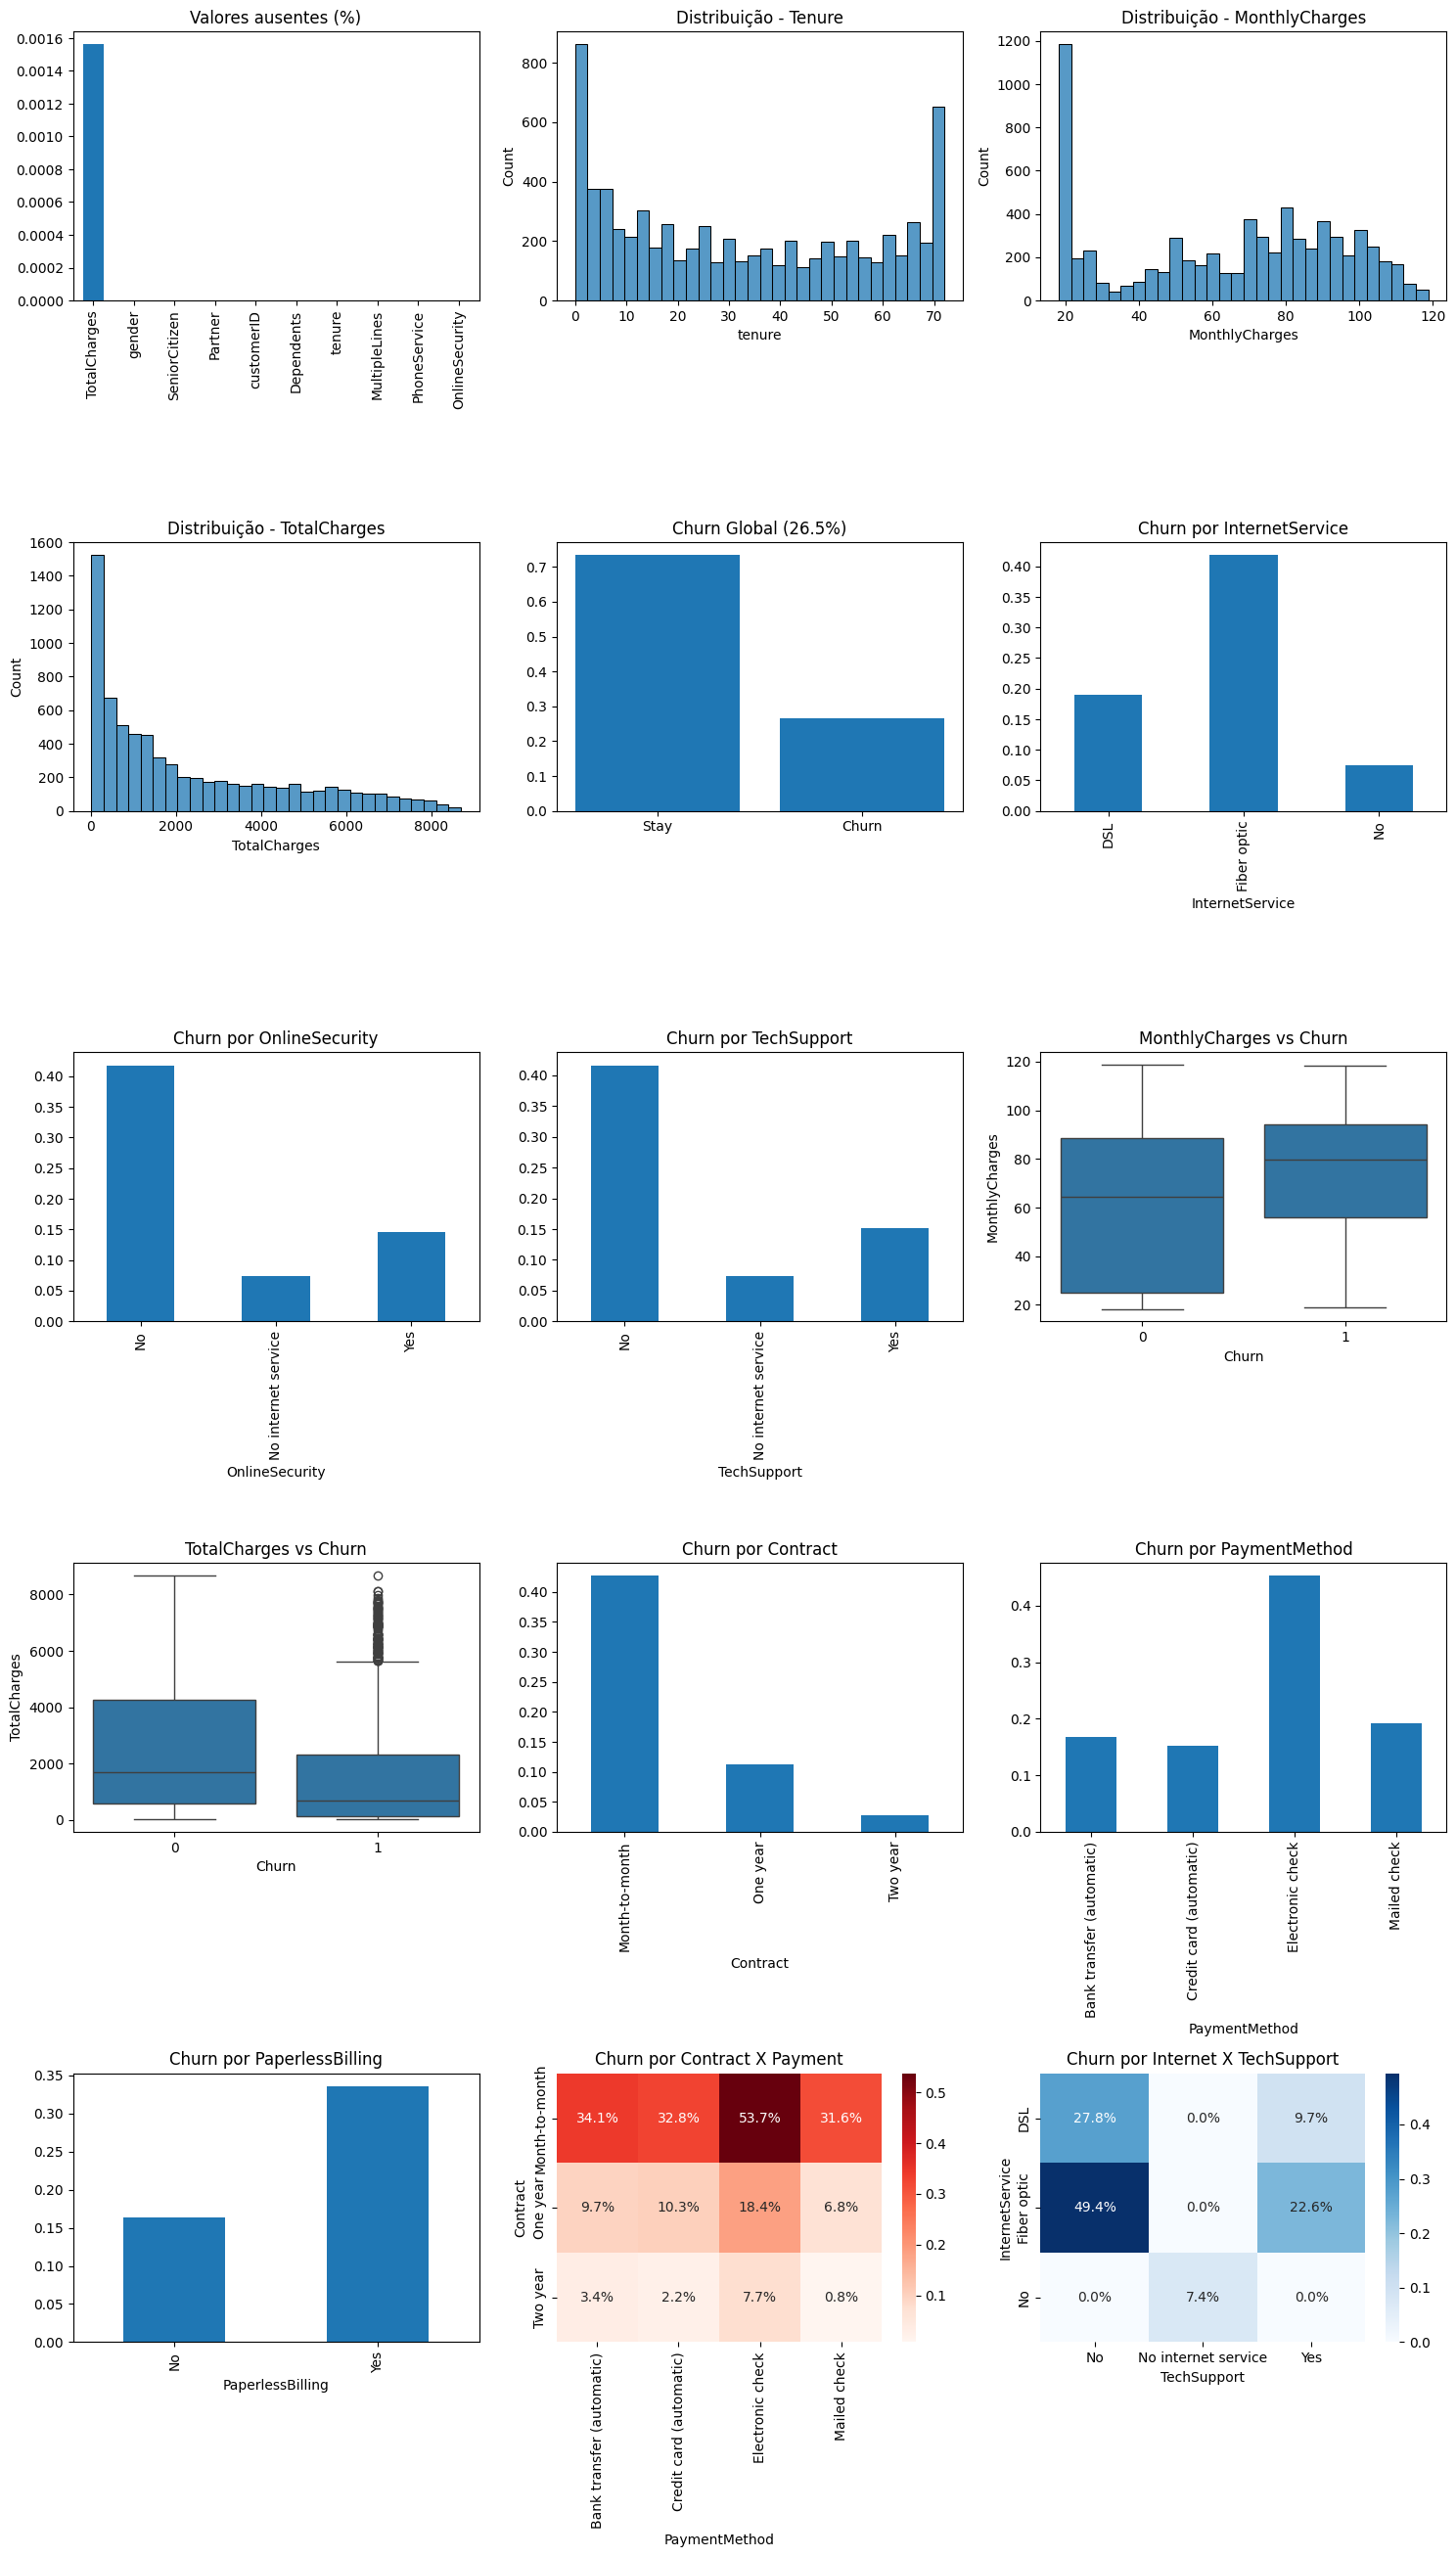

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def eda_grid(df, n_rows=9,n_cols=3):
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))
  axes = axes.flatten()
  idx = 0

  na = df.isna().mean().sort_values(ascending=False).head(10)
  na.plot(kind='bar', ax=axes[idx], title='Valores ausentes (%)')
  idx += 1

  if 'tenure' in df:
    sns.histplot(df['tenure'], bins=30, kde=False, ax=axes[idx])
    axes[idx].set_title('Distribuição - Tenure')
    idx += 1
  if 'MonthlyCharges' in df:
    sns.histplot(df['MonthlyCharges'], bins=30, kde=False, ax=axes[idx])
    axes[idx].set_title('Distribuição - MonthlyCharges')
    idx += 1
  if 'TotalCharges' in df:
    sns.histplot(df['TotalCharges'], bins=30, kde=False, ax=axes[idx])
    axes[idx].set_title('Distribuição - TotalCharges')
    idx += 1

  churn_rate = df['Churn'].mean()
  axes[idx].bar(['Stay', 'Churn'], [1-churn_rate, churn_rate])
  axes[idx].set_title(f'Churn Global ({churn_rate:.1%})')
  idx += 1

  for col in ['InternetService', 'OnlineSecurity', 'TechSupport']:
    if col in df:
      tmp = df.groupby(col)['Churn'].mean()
      tmp.plot(kind='bar', ax=axes[idx], title=f'Churn por {col}')
      idx += 1

  if'MonthlyCharges' in df:
    sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[idx])
    axes[idx].set_title('MonthlyCharges vs Churn')
    idx += 1
  if 'TotalCharges' in df:
    sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[idx])
    axes[idx].set_title('TotalCharges vs Churn')
    idx += 1

  for col in ['Contract', 'PaymentMethod', 'PaperlessBilling']:
    if col in df:
      tmp = df.groupby(col)['Churn'].mean()
      tmp.plot(kind='bar', ax=axes[idx], title=f'Churn por {col}')
      idx += 1

  if {'Contract', 'PaymentMethod'} <= set(df.columns):
    tab = pd.crosstab(df['Contract'], df['PaymentMethod'], values=df['Churn'], aggfunc='mean').fillna(0)
    sns.heatmap(tab, annot=True, fmt='.1%', cmap='Reds', ax=axes[idx])
    axes[idx].set_title('Churn por Contract X Payment')
    idx += 1
  if {'InternetService', 'TechSupport'} <= set(df.columns):
    tab = pd.crosstab(df['InternetService'], df['TechSupport'], values=df['Churn'], aggfunc='mean').fillna(0)
    sns.heatmap(tab, annot=True, fmt='.1%', cmap='Blues', ax=axes[idx])
    axes[idx].set_title('Churn por Internet X TechSupport')
    idx += 1

  for j in range(idx, len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

eda_grid(customer_churn)

# Insights de Negócio da Análise Exploratória (EDA)

Resumo dos principais insights obtidos em cada gráfico, conectando **padrões de dados** com **impacto no negócio**.

---

## Primeira grade de gráficos
1. **Valores ausentes (%)**  
   - Apenas `TotalCharges` possui valores nulos, e em quantidade mínima.  
   - **Insight**: a base é **confiável**, exigindo pouca imputação.

2. **Distribuição - Tenure**  
   - Muitos clientes cancelam logo no início (`tenure = 0`), mas os que permanecem tendem a ficar por muito tempo.  
   - **Insight**: churn **precoce** é o maior problema; clientes antigos são altamente fiéis.

3. **Distribuição - MonthlyCharges**  
   - Distribuição bimodal (baixo custo vs. alto custo).  
   - **Insight**: existem **dois perfis de clientes** distintos — planos básicos e planos premium.

4. **Distribuição - TotalCharges**  
   - A maioria dos clientes acumula baixo gasto (saíram cedo), poucos chegam a valores altos.  
   - **Insight**: **clientes antigos são os mais valiosos** para a receita recorrente.

5. **Churn Global (26.5%)**  
   - 1 a cada 4 clientes cancela.  
   - **Insight**: churn é um **problema crítico** que exige estratégias de retenção.

6. **Churn por InternetService**  
   - Clientes de fibra ótica têm churn bem mais alto (~42%).  
   - **Insight**: **fibra ótica está gerando insatisfação**, possivelmente por preço ou qualidade.

---

## Segunda grade de gráficos
7. **Churn por OnlineSecurity**  
   - Clientes sem segurança online têm churn >40%.  
   - **Insight**: oferecer **serviços adicionais de segurança** pode reduzir cancelamentos.

8. **Churn por TechSupport**  
   - Sem suporte técnico → churn alto. Com suporte → churn baixo.  
   - **Insight**: **suporte ativo** é fator de fidelização.

9. **MonthlyCharges vs. Churn**  
   - Clientes que cancelam pagam tarifas mais altas em média.  
   - **Insight**: **preço elevado é um driver de churn**.

10. **TotalCharges vs. Churn**  
   - Cancelamentos ocorrem cedo (baixo total acumulado), mas há exceções caras.  
   - **Insight**: perder **clientes de alto valor é um grande prejuízo**.

11. **Churn por Contract**  
   - Month-to-month → churn altíssimo (>40%).  
   - Contratos de 1 ou 2 anos → churn <10%.  
   - **Insight**: **contratos longos blindam contra churn**.

12. **Churn por PaymentMethod**  
   - Electronic check → churn alto (~45%).  
   - Pagamento automático → churn baixo (~15%).  
   - **Insight**: incentivar **pagamento automático aumenta retenção**.

---

## Terceira grade de gráficos
13. **Churn por PaperlessBilling**  
   - Clientes com faturamento digital têm churn maior (~34%).  
   - **Insight**: pode refletir **perfil mais jovem e volátil**, exigindo estratégias específicas.

14. **Churn - Contract x PaymentMethod**  
   - Pior cenário: **month-to-month + electronic check (~54% churn)**.  
   - Melhor cenário: **2 anos + pagamento automático (<3%)**.  
   - **Insight**: **campanhas de migração** para contratos longos e métodos automáticos são chave.

15. **Churn - Internet x TechSupport**  
   - Fibra ótica sem suporte → churn altíssimo (~49%).  
   - DSL + suporte → churn baixo (~10%).  
   - **Insight**: **problema concentrado nos clientes de fibra ótica sem suporte**.

---

## Resumo Executivo
- **Drivers de risco**: contratos curtos, electronic check, ausência de serviços adicionais, fibra ótica, clientes novos e com alto ticket mensal.  
- **Drivers de retenção**: contratos longos, pagamento automático, serviços adicionais, clientes de baixo ticket.  
- **Ações recomendadas**:  
  - Incentivar **contratos longos**.  
  - Migrar clientes de **electronic check para métodos automáticos**.  
  - Oferecer **segurança online e suporte técnico como pacotes de fidelização**.  
  - Tratar **clientes de fibra ótica** como prioridade em retenção.  


# Preparação dos Dados


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import os

In [ ]:
TARGET_COL = 'Churn'
ID_COLS = [col for col in ["customerID","CustomerID","customer_id"] if col in customer_churn.columns]
os.makedirs('artifacts_prep', exist_ok=True)

In [ ]:
col_explicativas = [col for col in customer_churn.columns if col not in ID_COLS + [TARGET_COL]]
col_explicativas

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [ ]:
 tipo = dict(zip(metadados['variavel'], metadados['tipo']))
 num_cols = [col for col in col_explicativas if tipo.get(col) == 'numerica']
 cat_cols = [col for col in col_explicativas if tipo.get(col) == 'categorica']

 print('Númericas: ', num_cols)
 print('Categoricas: ', cat_cols)

Númericas:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categoricas:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


## Tratamento dos Nulos

In [ ]:
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

## Cardinalidade

In [ ]:
card = dict(zip(metadados['variavel'], metadados['cardinalidade']))
cat_baixa = [col for col in cat_cols if card.get(col) < 10]
cat_alta = [col for col in cat_cols if card.get(col) >= 10]

print('Categoricas com baixa cardinalidade: ', len(cat_baixa))
print('Categoricas com alta cardinalidade: ', len(cat_alta))

Categoricas com baixa cardinalidade:  15
Categoricas com alta cardinalidade:  0


## Label Encoding para Alta Cardinalidade

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_alta = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=-1,
    encoded_missing_value=-1
)

## One-Hot Encoding para Baixa Cardinalidade

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

## Normalização/ Padronização

In [ ]:
#normalização
'''scaler_num = MinMaxScaler()'''
#padronização
scaler_num = StandardScaler()

## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', scaler_num)
])

pipe_cat_baixa = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', ohe)
])

pipe_cat_alta = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', ordinal_alta)
])

preprocess = ColumnTransformer(
    transformers=[
      ('num', pipe_num, num_cols),
      ('cat_baixa', pipe_cat_baixa, cat_baixa),
      ('cat_alta', pipe_cat_alta, cat_alta)
    ],
    remainder='drop'
)

preprocess

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges']),
                                ('cat_baixa',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['gender',...
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod']),
                                ('cat_alta',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('ordinal',
                                                  OrdinalEncoder(encoded_missing_value=-1,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 [])])

In [ ]:
X = customer_churn[col_explicativas].copy()
y = customer_churn[TARGET_COL].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train_prep = preprocess.fit_transform(X_train)
X_test_prep = preprocess.transform(X_test)

In [ ]:
X_train_prep.shape, X_test_prep.shape

((5634, 45), (1409, 45))

In [ ]:
y_train.shape, y_test.shape

((5634,), (1409,))

# Feture Importance com Gradient Boosting

In [ ]:
feature_names = []
feature_names += num_cols

ohe_names = []
if len(cat_baixa):
    ohe_names = preprocess.named_transformers_["cat_baixa"].named_steps["ohe"].get_feature_names_out(input_features=cat_baixa).tolist()
feature_names += ohe_names
feature_names += cat_alta
feature_names

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Female',
 'gender_Male',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank tran

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_prep, y_train)

imp = pd.Series(gb.feature_importances_, index=feature_names).sort_values(ascending=False)

def origem(col):
  if('_' in col) and (col.split('_')[0] in cat_baixa):
    return col.split('_')[0]
  return col

imp_var = imp.groupby(imp.index.map(origem)).sum().sort_values(ascending=False)
top_gb = imp_var.to_frame('gb_importance')
top_gb.head(20)

,gb_importance
Contract,0.389120
tenure,0.138682
InternetService,0.086885
TotalCharges,0.085531
MonthlyCharges,0.082426
OnlineSecurity,0.068142
PaymentMethod,0.047008
TechSupport,0.038949
PaperlessBilling,0.019884
MultipleLines,0.010903


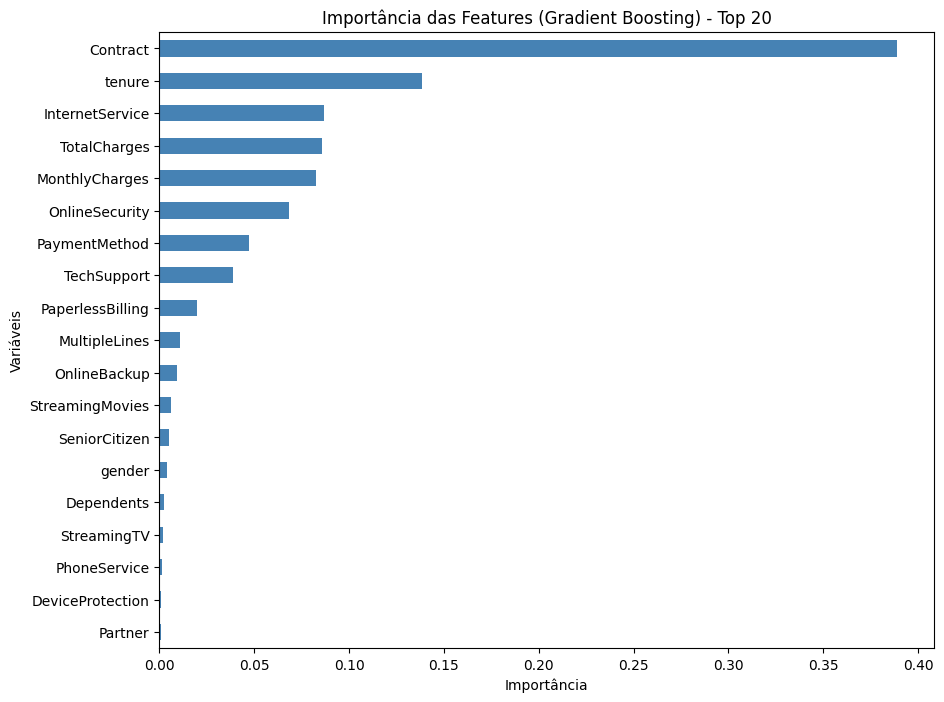

In [ ]:
imp_plot = imp_var.head(20).sort_values(ascending=True)
plt.figure(figsize=(10,8))
imp_plot.plot(kind='barh', color='steelblue')
plt.title('Importância das Features (Gradient Boosting) - Top 20')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.show()

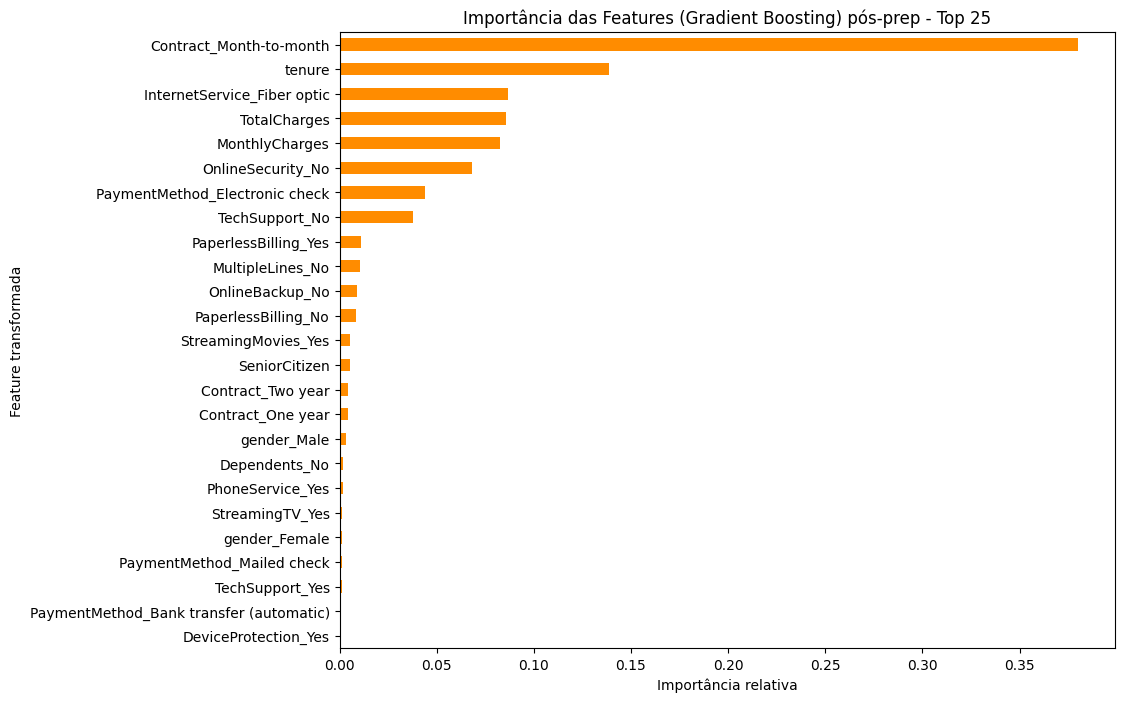

In [ ]:
imp_final = pd.Series(gb.feature_importances_, index=feature_names).sort_values(ascending=True)

imp_final_plot = imp_final.tail(25)
plt.figure(figsize=(10,8))
imp_final_plot.plot(kind='barh', color='darkorange')
plt.title('Importância das Features (Gradient Boosting) pós-prep - Top 25')
plt.xlabel('Importância relativa')
plt.ylabel('Feature transformada')
plt.show()

In [ ]:
imp_final = pd.Series(gb.feature_importances_, index=feature_names)
selected_features = imp_final[imp_final > 0].index.tolist()

X_train_selected = pd.DataFrame(X_train_prep, columns=feature_names)[selected_features]
X_test_selected = pd.DataFrame(X_test_prep, columns=feature_names)[selected_features]

y_train_selected = pd.DataFrame(y_train, columns=[TARGET_COL])
y_test_selected = pd.DataFrame(y_test, columns=[TARGET_COL])


# Machine Leaning

## Regressao Logística

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

log_reg = LogisticRegression(max_iter=2000, solver='liblinear', class_weight='balanced', random_state=42)
grid_log_reg = GridSearchCV(estimator=log_reg, param_grid={'C': [0.1, 1, 10]}, scoring='roc_auc', cv=cv, n_jobs=-1)
grid_log_reg.fit(X_train_selected, y_train_selected)
best_log_reg = grid_log_reg.best_estimator_
print('Logistic AUC (CV): ', grid_log_reg.best_score_, '| best_params: ', grid_log_reg.best_params_)

Logistic AUC (CV):  0.845937560476818 | best_params:  {'C': 10}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced_subsample')
grid_rf = GridSearchCV(estimator=rf,
                       param_grid={'n_estimators': [200, 500],
                                   'max_depth': [None, 10],
                                   'min_samples_leaf': [1,5]},
                       scoring='roc_auc', cv=cv, n_jobs=-1)
grid_rf.fit(X_train_selected, y_train_selected)
best_rf = grid_rf.best_estimator_
print('Random Forest AUC (CV): ', grid_rf.best_score_, '| best_params: ', grid_rf.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest AUC (CV):  0.8462072301699489 | best_params:  {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 500}


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
grid_gb = GridSearchCV(estimator=gb,
                       param_grid={'learning_rate': [0.05, 0.1],
                                   'n_estimators': [200, 500],
                                   'max_depth': [2, 3]},
                       scoring='roc_auc', cv=cv, n_jobs=-1)
grid_gb.fit(X_train_selected, y_train_selected)
best_gb = grid_gb.best_estimator_
print('Gradient Boosting AUC (CV): ', grid_gb.best_score_, '| best_params: ', grid_gb.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting AUC (CV):  0.8486530885355198 | best_params:  {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 200}


## SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(probability=True, class_weight='balanced', random_state=42)
grid_svm = GridSearchCV(estimator=svm,
                        param_grid={'kernel': ['linear', 'rbf'],
                                    'C': [0.5, 1, 2]},
                        scoring='roc_auc', cv=cv, n_jobs=-1)
grid_svm.fit(X_train_selected, y_train_selected)
best_svm = grid_svm.best_estimator_
print('SVM AUC (CV): ', grid_svm.best_score_, '| best_params: ', grid_svm.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM AUC (CV):  0.8349795528442225 | best_params:  {'C': 2, 'kernel': 'linear'}


## Comparação de modelos

In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score

def eval_model(name, model, X_test, y_test, thr=0.5):
  prob = model.predict_proba(X_test)[:,1]
  pred = (prob > thr).astype(int)
  auc = roc_auc_score(y_test, prob)
  prec = precision_score(y_test, pred, zero_division=0)
  rec = recall_score(y_test, pred, zero_division=0)
  gini = 2 * auc - 1
  return {'model': name, 'Auc': auc, 'Precision': prec, 'Recall': rec, 'Gini': gini}

results = []
results.append(eval_model('LogisticRegression', best_log_reg, X_test_selected, y_test_selected))
results.append(eval_model('RandomForest', best_rf, X_test_selected, y_test_selected))
results.append(eval_model('GradientBoosting', best_gb, X_test_selected, y_test_selected))
results.append(eval_model('SVM', best_svm, X_test_selected, y_test_selected))

cmp = pd.DataFrame(results).sort_values('Auc', ascending=False).reset_index(drop=True)
cmp

,model,Auc,Precision,Recall,Gini
0,GradientBoosting,0.845688,0.660777,0.500000,0.691377
1,RandomForest,0.843012,0.539499,0.748663,0.686024
2,LogisticRegression,0.840954,0.506920,0.783422,0.681909
3,SVM,0.809974,0.000000,0.000000,0.619949


## Melhores hiperparâmetros

In [ ]:
pd.DataFrame([
    {'model': 'LogisticRegression', 'best_params': grid_log_reg.best_params_},
    {'model': 'RandomForest', 'best_params': grid_rf.best_params_},
    {'model': 'GradientBoosting', 'best_params': grid_gb.best_params_},
    {'model': 'SVM', 'best_params': grid_svm.best_params_}
])

,model,best_params
0,LogisticRegression,{'C': 10}
1,RandomForest,"{'max_depth': 10, 'min_samples_leaf': 5, 'n_es..."
2,GradientBoosting,"{'learning_rate': 0.05, 'max_depth': 2, 'n_est..."
3,SVM,"{'C': 2, 'kernel': 'linear'}"


## Ordenação dos Modelos

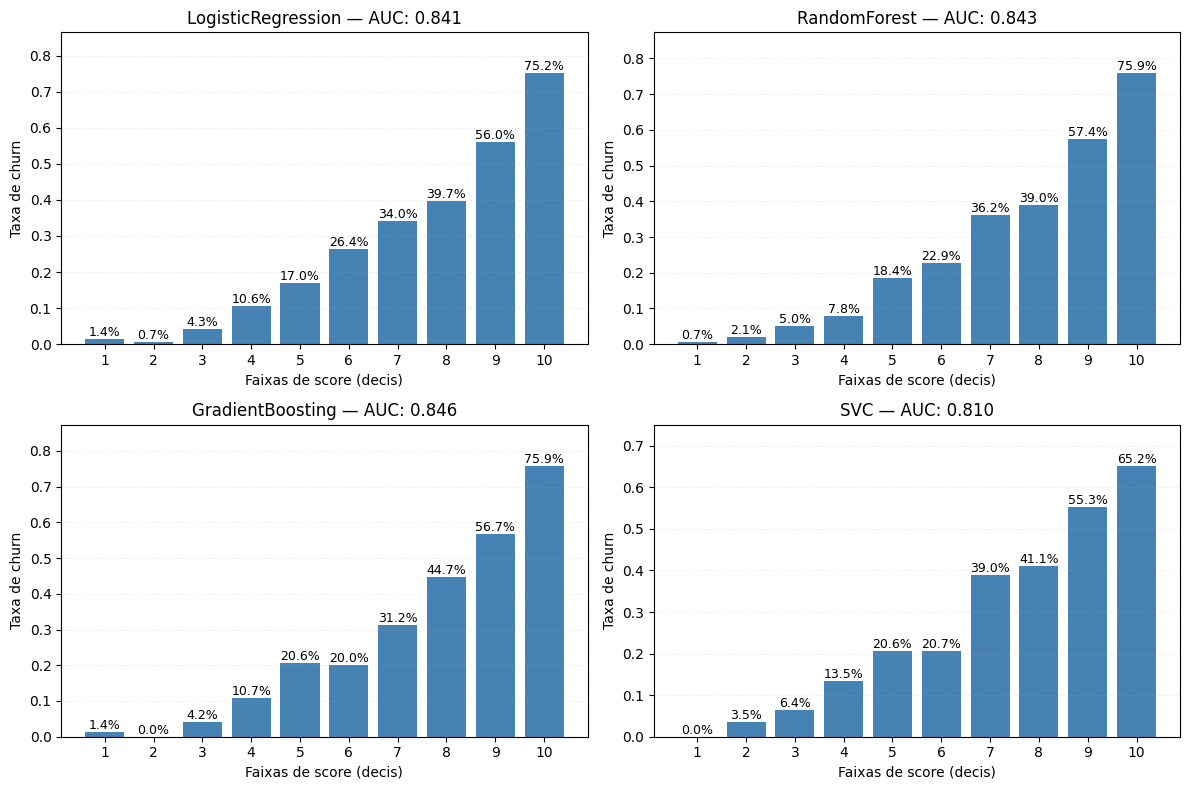

In [ ]:
from math import ceil

def _to_1d(a):
    if isinstance(a, pd.DataFrame):
        return a.to_numpy().ravel()
    if isinstance(a, pd.Series):
        return a.to_numpy().ravel()
    return np.asarray(a).ravel()

def model_probs(model, X):
    if hasattr(model, "predict_proba"):
        return _to_1d(model.predict_proba(X)[:, 1])
    elif hasattr(model, "decision_function"):
        s = _to_1d(model.decision_function(X))
        return (s - s.min()) / (s.max() - s.min() + 1e-12)
    else:
        raise ValueError("Modelo não tem predict_proba nem decision_function.")

def decile_plot_for_model(ax, y_true, y_prob, n_bins=10, title=""):
    y_true = _to_1d(y_true)
    y_prob = _to_1d(y_prob)

    q = pd.qcut(y_prob, q=n_bins, duplicates="drop")
    cats = pd.Categorical(q)
    k = len(cats.categories)
    decil_codes = pd.Series(cats.codes + 1)
    decil_codes = decil_codes.replace({0: np.nan}) if (cats.codes.min() == -1) else decil_codes

    df_plot = pd.DataFrame({"decil": decil_codes, "y": y_true}).dropna(subset=["decil"])
    grp = df_plot.groupby("decil", observed=True)["y"].mean().reset_index()
    grp = grp.sort_values("decil")

    ax.bar(grp["decil"].astype(int).astype(str), grp["y"], width=0.8, color="steelblue")
    ax.set_xlabel("Faixas de score (decis)")
    ax.set_ylabel("Taxa de churn")
    ax.set_title(title)
    ax.set_ylim(0, max(0.001, grp["y"].max()*1.15))
    for x, v in zip(grp["decil"].astype(int).astype(str), grp["y"].values):
        ax.text(x, v, f"{v:.1%}", ha="center", va="bottom", fontsize=9)
    ax.grid(True, axis="y", linestyle=":", alpha=0.3)

def plot_deciles_grid(models: dict, X_test, y_test, n_bins=10, n_cols=2):
    names = list(models.keys())
    n_models = len(names)
    n_rows = ceil(n_models / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
    axes = np.array(axes).reshape(n_rows, n_cols)

    y_test_1d = _to_1d(y_test)

    for i, name in enumerate(names):
        r, c = divmod(i, n_cols)
        ax = axes[r, c]
        prob = model_probs(models[name], X_test)
        auc = roc_auc_score(y_test_1d, prob)
        title = f"{name} — AUC: {auc:.3f}"
        decile_plot_for_model(ax, y_true=y_test_1d, y_prob=prob, n_bins=n_bins, title=title)

    for j in range(i+1, n_rows*n_cols):
        r, c = divmod(j, n_cols)
        fig.delaxes(axes[r, c])

    plt.tight_layout()
    plt.show()




models = {
    "LogisticRegression": best_log_reg,
    "RandomForest":       best_rf,
    "GradientBoosting":   best_gb,
    "SVC":                best_svm,
}
plot_deciles_grid(models, X_test_selected, y_test_selected, n_bins=10, n_cols=2)

